In [1]:
%cd /workspace

from glob import glob

import matplotlib.pyplot as plt
import umap
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from baseline.evaluate import calculate_score
from baseline.limesoda import read_limesoda


LIMESODA_DIR = "dataset/LimeSoda/"
DELIMITER = ""
model_name = "weights/raw/wangchanberta-simcse-raw-bs24-epoch1-lr3e-05"

/workspace


In [2]:
dataset = read_limesoda(LIMESODA_DIR, delimiter=DELIMITER)

100%|█████████████████████████████████████| 2765/2765 [00:00<00:00, 10696.24it/s]


In [3]:
len(dataset["train"]), len(dataset["val"]), len(dataset["test"])

(2698, 300, 438)

In [51]:
model = SentenceTransformer(model_name)

x_train = model.encode(dataset["train"]["text"].tolist())
x_val = model.encode(dataset["val"]["text"].tolist())
x_test = model.encode(dataset["test"]["text"].tolist())

y_train = dataset["train"]["label"].values
y_val = dataset["val"]["label"].values
y_test = dataset["test"]["label"].values

In [54]:
scaled_data = StandardScaler().fit_transform(x_train)

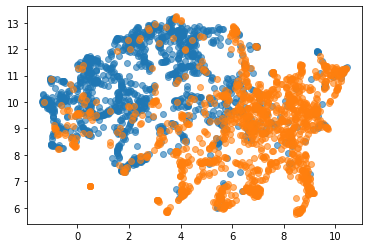

In [55]:
reducer = umap.UMAP()
emb = reducer.fit_transform(scaled_data)

plt.scatter(emb[y_train==1][:, 0], emb[y_train==1][:, 1], label="Fact", alpha=0.6)
plt.scatter(emb[y_train==0][:, 0], emb[y_train==0][:, 1], label="Fake", alpha=0.6)

In [81]:
model_name

'weights/raw/wangchanberta-simcse-raw-bs16-epoch1-lr0.0001'

In [80]:
models = sorted(glob("weights/raw/*"))

for model_name in models:
    print(">"*10)
    print(model_name.split("/")[-1])
    print(">"*10)
    model = SentenceTransformer(model_name)

    x_train = model.encode(dataset["train"]["text"].tolist())
    x_val = model.encode(dataset["val"]["text"].tolist())
    x_test = model.encode(dataset["test"]["text"].tolist())

    y_train = dataset["train"]["label"].values
    y_val = dataset["val"]["label"].values
    y_test = dataset["test"]["label"].values
    
    lr = LogisticRegression(max_iter=500).fit(x_train, y_train)

    result = calculate_score(y_train, lr.predict(x_train))
    _ = result.pop("prediction")
    print(f"Train:\n\tAccuracy: {result['accuracy']['overall']*100:.2f}%\n\tMacro F1: {result['f1']['macro']*100:.2f}%")

    result = calculate_score(y_val, lr.predict(x_val))
    _ = result.pop("prediction")
    print(f"Valn:\n\tAccuracy: {result['accuracy']['overall']*100:.2f}%\n\tMacro F1: {result['f1']['macro']*100:.2f}%")

    result = calculate_score(y_test, lr.predict(x_test))
    _ = result.pop("prediction")
    print(f"Test:\n\tAccuracy: {result['accuracy']['overall']*100:.2f}%\n\tMacro F1: {result['f1']['macro']*100:.2f}%")

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_val = scaler.transform(x_val)
    x_test = scaler.transform(x_test)

    reducer = umap.UMAP()
    train_emb = reducer.fit_transform(x_train)
    val_emb = reducer.transform(x_val)
    test_emb = reducer.transform(x_test)


    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(model_name.split("/")[-1])
    ax[0].scatter(train_emb[y_train==1][:, 0], train_emb[y_train==1][:, 1], label="Fact", alpha=0.6)
    ax[0].scatter(train_emb[y_train==0][:, 0], train_emb[y_train==0][:, 1], label="Fake", alpha=0.6)
    ax[0].set_title("train")
    
    ax[1].scatter(val_emb[y_val==1][:, 0], val_emb[y_val==1][:, 1], label="Fact", alpha=0.6)
    ax[1].scatter(val_emb[y_val==0][:, 0], val_emb[y_val==0][:, 1], label="Fake", alpha=0.6)
    ax[1].set_title("val")
    
    ax[2].scatter(test_emb[y_test==1][:, 0], test_emb[y_test==1][:, 1], label="Fact", alpha=0.6)
    ax[2].scatter(test_emb[y_test==0][:, 0], test_emb[y_test==0][:, 1], label="Fake", alpha=0.6)
    ax[2].set_title("test")
    
    plt.show()
    

>>>>>>>>>>
wangchanberta-simcse-raw-bs16-epoch1-lr0.0001
>>>>>>>>>>


KeyboardInterrupt: 